[*********************100%***********************]  1 of 1 completed


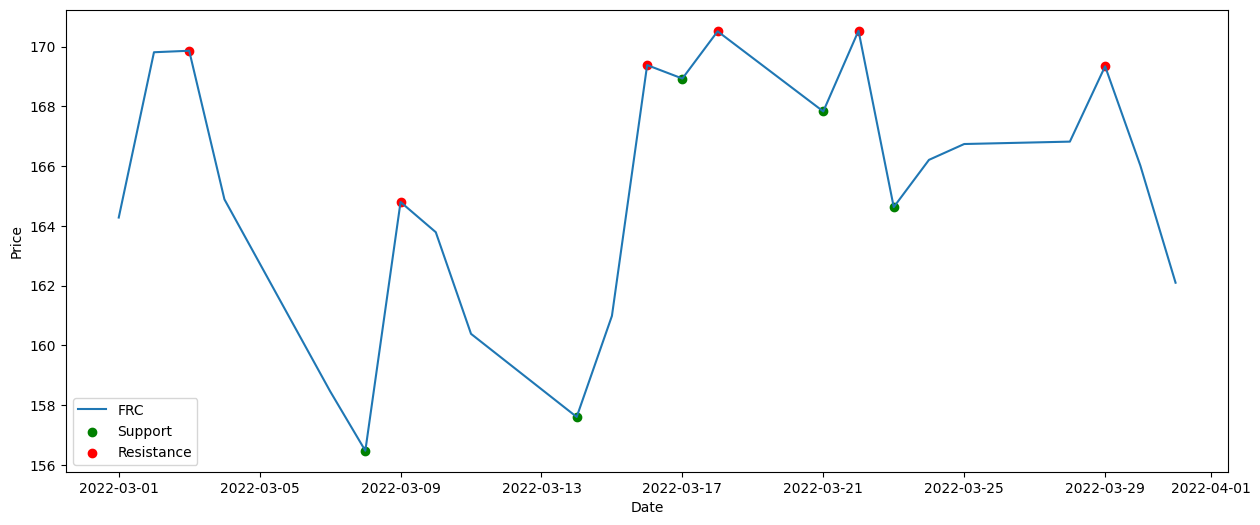

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

asset = 'FRC'
start_date = '2022-03-01'
end_date = '2022-04-01'

data = yf.download(asset, start=start_date, end=end_date)

# Define the comparator functions for minima and maxima
comparator_min = lambda x, y: x < y
comparator_max = lambda x, y: x > y

# Find the local minima and maxima
local_minima = argrelextrema(data['Close'].values, comparator_min)
local_maxima = argrelextrema(data['Close'].values, comparator_max)

# Plot the data with the identified support and resistance levels
plt.figure(figsize=(15, 6))
plt.plot(data['Close'], label=asset)
plt.scatter(data.iloc[local_minima].index, data.iloc[local_minima]['Close'], c='g', marker='o', label='Support')
plt.scatter(data.iloc[local_maxima].index, data.iloc[local_maxima]['Close'], c='r', marker='o', label='Resistance')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


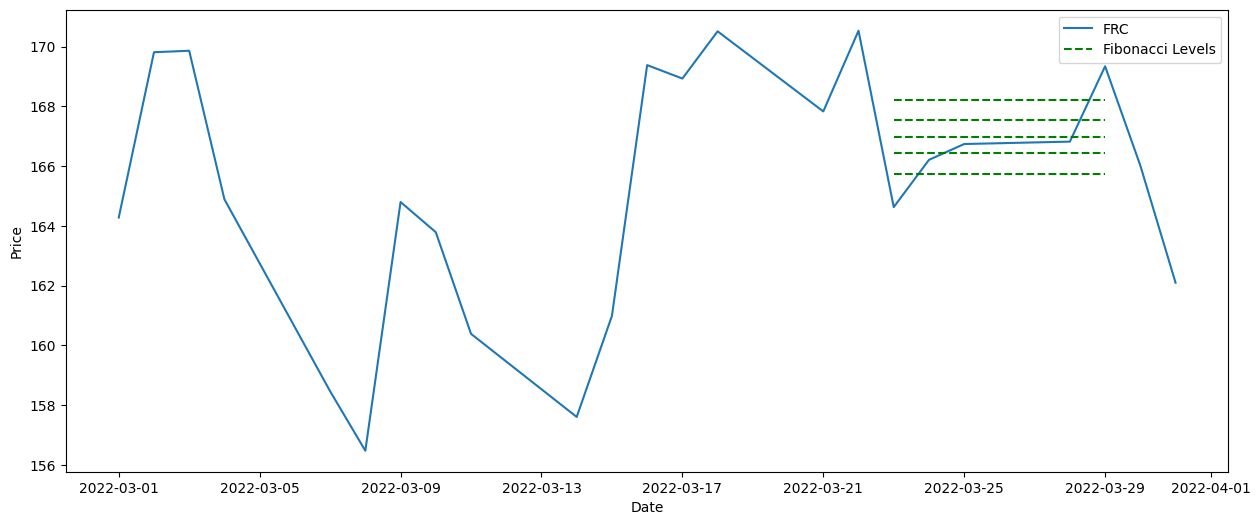

In [6]:
# Find the most recent significant low and high points
most_recent_low = data.iloc[local_minima].index[-1]
most_recent_high = data.iloc[local_maxima].index[-1]
low_price = data.loc[most_recent_low, 'Close']
high_price = data.loc[most_recent_high, 'Close']

# Calculate the Fibonacci retracement levels
fibonacci_levels = [0.236, 0.382, 0.5, 0.618, 0.764]
fibonacci_prices = [(high_price - low_price) * level + low_price for level in fibonacci_levels]

# Plot the Fibonacci retracement levels
plt.figure(figsize=(15, 6))
plt.plot(data['Close'], label=asset)
plt.hlines(fibonacci_prices, most_recent_low, most_recent_high, colors='g', linestyles='--', label='Fibonacci Levels')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
